<a href="https://colab.research.google.com/github/YaraMansour1985/Chicago-crime-prediction/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pandas
import pandas as pd
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**topic 1: comparing policy districts**
1. which district has the most crimes in 2022
2. which had the least

In [2]:
#load data
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week22/Data/Chicago-Crime_2022.csv')
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,12582293,01/01/2022 01:00:00 PM,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060
1,12607313,01/01/2022 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446
2,12585671,01/01/2022 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120
3,12592889,01/01/2022 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147
4,12584977,01/01/2022 01:00:00 AM,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560


In [3]:
# Group by district and count crimes
crime_counts = df.groupby('District').size().sort_values(ascending=False)
print("Crimes per district (descending):")
print(crime_counts)

Crimes per district (descending):
District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
dtype: int64


In [4]:
# Highest crime district
highest = crime_counts.idxmax()
highest_count = crime_counts.max()

In [5]:
# Lowest crime district
lowest = crime_counts.idxmin()
lowest_count = crime_counts.min()

In [6]:
print("\nDistrict with highest crime:", highest, "with", highest_count, "crimes")
print("District with lowest crime:", lowest, "with", lowest_count, "crimes")


District with highest crime: 8.0 with 14805 crimes
District with lowest crime: 31.0 with 15 crimes


Files extracted to: /content/ChicagoCrime_extracted
Found 22 CSV files.


/tmp/ipython-input-234977675.py:56: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True, dayfirst=False)
/tmp/ipython-input-234977675.py:56: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True, dayfirst=False)
/tmp/ipython-input-234977675.py:56: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see 

Combined dataframe shape: (7713109, 13)

Crimes per year:
 Year
2001    485886
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437087
2008    427183
2009    392827
2010    370513
2011    351993
2012    336319
2013    307536
2014    275789
2015    264787
2016    269823
2017    269100
2018    268899
2019    261325
2020    212194
2021    208824
2022    238858
dtype: int64

Absolute year-to-year change:
 Year
2002      921
2003   -10822
2004    -6563
2005   -15649
2006    -5594
2007   -11092
2008    -9904
2009   -34356
2010   -22314
2011   -18520
2012   -15674
2013   -28783
2014   -31747
2015   -11002
2016     5036
2017     -723
2018     -201
2019    -7574
2020   -49131
2021    -3370
2022    30034
dtype: int64

Percent change year-to-year (%):
 Year
2002     0.19
2003    -2.22
2004    -1.38
2005    -3.33
2006    -1.23
2007    -2.47
2008    -2.27
2009    -8.04
2010    -5.68
2011    -5.00
2012    -4.45
2013    -8.56
2014   -10.32
2015    -3.99
2016     1.90

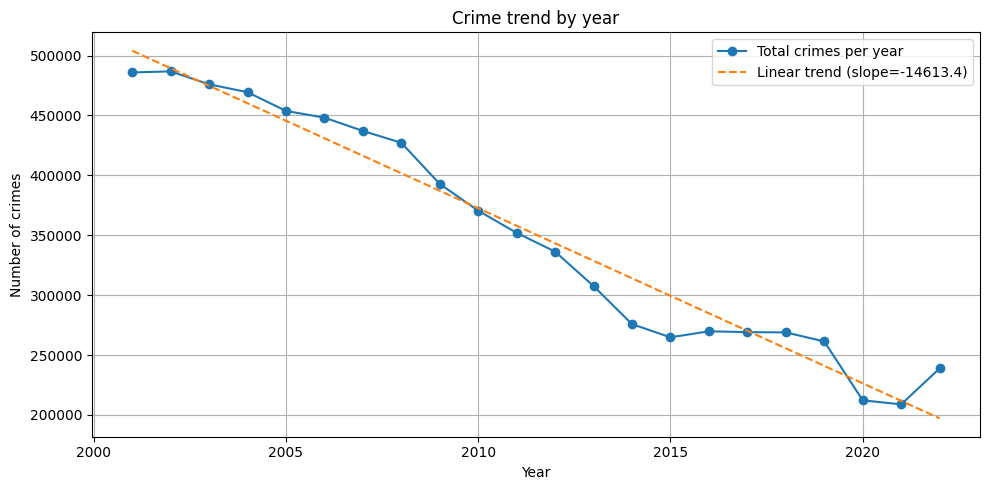

In [7]:
# === Combine year files (2001-2022), extract year from Date column, and analyze trend ===

import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile # Import zipfile

# --- ADJUST THIS PATH to where you uploaded the folder in Colab ---
# Option A (Colab Files upload): use /content/ChicagoCrime/
# Option B (Google Drive): mount drive and use '/content/drive/MyDrive/your_folder'
zip_file_path = '/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week22/Chicago_Crime_2001-2022.zip'   # <- Original zip file path

# Create a temporary directory to extract the files
extracted_folder_path = '/content/ChicagoCrime_extracted'
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract all files from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    zf.extractall(extracted_folder_path)
print(f"Files extracted to: {extracted_folder_path}")

# Now, set folder_path to the extracted directory
folder_path = extracted_folder_path

# Find CSV files in the extracted directory (recursive search for files in 'Data/' subfolder)
files = sorted(glob.glob(os.path.join(folder_path, '**', '*.csv'), recursive=True))
print(f"Found {len(files)} CSV files.")

all_dfs = []
for file in files:
    df = pd.read_csv(file, low_memory=False)

    # --- find a column that looks like a date column (case-insensitive search) ---
    date_cols = [c for c in df.columns if 'date' in c.lower()]
    if not date_cols:
        # fallback: try common names
        candidates = ['incident date', 'reporteddate', 'report_date', 'occurred_on_date']
        found = None
        for cand in candidates:
            for c in df.columns:
                if cand in c.lower().replace(' ', ''):
                    found = c
                    break
            if found: break
        if not found:
            raise ValueError(f"No date-like column found in file: {os.path.basename(file)}. Columns: {df.columns.tolist()}")
        date_col = found
    else:
        date_col = date_cols[0]

    # Convert to datetime (coerce invalid -> NaT).
    # If your dates are month/day/year use dayfirst=False; if day/month/year use dayfirst=True
    # If you're unsure, try dayfirst=False (US format). Change if you see many NaT.
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True, dayfirst=False)

    # Drop rows where date conversion failed (optional)
    before = len(df)
    df = df.dropna(subset=[date_col])
    after = len(df)
    if after < before:
        print(f"{os.path.basename(file)}: dropped {before-after} rows due to unparseable dates.")

    # Extract year
    df['Year'] = df[date_col].dt.year.astype(int)

    all_dfs.append(df)

# Combine all files
full_df = pd.concat(all_dfs, ignore_index=True)
print("Combined dataframe shape:", full_df.shape)

# --- Aggregate crimes by year ---
crimes_per_year = full_df.groupby('Year').size().sort_index()
print("\nCrimes per year:\n", crimes_per_year)

# --- Year-to-year absolute and percent change ---
abs_change = crimes_per_year.diff()
pct_change = crimes_per_year.pct_change() * 100

print("\nAbsolute year-to-year change:\n", abs_change.dropna().astype(int))
print("\nPercent change year-to-year (%):\n", pct_change.dropna().round(2))

# --- Simple linear trend (slope) to detect overall increase/decrease ---
years = crimes_per_year.index.values
counts = crimes_per_year.values

# Fit linear regression (counts = slope * year + intercept)
slope, intercept = np.polyfit(years, counts, 1)
print(f"\nLinear trend slope = {slope:.2f} crimes per year.")
if slope > 0:
    print("Overall trend: crimes are increasing (positive slope).")
elif slope < 0:
    print("Overall trend: crimes are decreasing (negative slope).")
else:
    print("Overall trend: flat (slope \u2248 0).")

# --- Plot the results ---
plt.figure(figsize=(10,5))
plt.plot(years, counts, marker='o', label='Total crimes per year')
# regression line
reg_line = slope * years + intercept
plt.plot(years, reg_line, linestyle='--', label=f'Linear trend (slope={slope:.1f})')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Crime trend by year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**topic 3: comparing crimes at AM Or PM**
1. are crimes more common in AM or PM


In [8]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Extract the hour from the Date column
df['Hour'] = df['Date'].dt.hour
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Hour
0,12582293,2022-01-01 13:00:00,THEFT,$500 AND UNDER,RESTAURANT,False,False,121,1.0,42.0,41.881884,-87.640060,2022,13
1,12607313,2022-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,811,8.0,23.0,41.787923,-87.769446,2022,13
2,12585671,2022-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,531,5.0,9.0,41.687443,-87.604120,2022,1
3,12592889,2022-01-01 01:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,412,4.0,8.0,41.734353,-87.585147,2022,1
4,12584977,2022-01-01 01:00:00,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,1811,18.0,2.0,41.910818,-87.654560,2022,1


In [10]:
# Filter AM rush hour (7–10 AM)
am_rush_df = df[(df['Hour'] >= 7) & (df['Hour'] <= 10)]
print(am_rush_df)

              ID                Date                Primary Type  \
334     12582037 2022-01-01 07:00:00           WEAPONS VIOLATION   
335     12625602 2022-01-01 07:00:00                 SEX OFFENSE   
336     12583185 2022-01-01 07:00:00             CRIMINAL DAMAGE   
337     12751649 2022-01-01 07:00:00             CRIMINAL DAMAGE   
338     12582172 2022-01-01 07:00:00                     BATTERY   
...          ...                 ...                         ...   
238678  12937829 2022-12-31 10:47:00             CRIMINAL DAMAGE   
238680  12937783 2022-12-31 10:50:00             CRIMINAL DAMAGE   
238684  12937973 2022-12-31 10:55:00  OFFENSE INVOLVING CHILDREN   
238685  12937866 2022-12-31 10:57:00                     BATTERY   
238686  12937781 2022-12-31 10:58:00                     ROBBERY   

                                              Description  \
334                            RECKLESS FIREARM DISCHARGE   
335                      AGGRAVATED CRIMINAL SEXUAL ABUSE   


In [11]:
#filter PM rush hour 4-7 pm
pm_rush_df = df[(df['Hour'] >= 16) & (df['Hour'] <= 19)]
print(pm_rush_df)

              ID                Date                Primary Type  \
205     12600306 2022-01-01 16:00:00          DECEPTIVE PRACTICE   
208     12582346 2022-01-01 16:00:00         MOTOR VEHICLE THEFT   
215     12582555 2022-01-01 16:00:00                     ROBBERY   
221     12584911 2022-01-01 16:00:00                       THEFT   
224     12643135 2022-01-01 16:03:00  OFFENSE INVOLVING CHILDREN   
...          ...                 ...                         ...   
238497  12938900 2022-12-31 19:40:00               OTHER OFFENSE   
238498  12938212 2022-12-31 19:40:00                     BATTERY   
238500  12938254 2022-12-31 19:44:00             CRIMINAL DAMAGE   
238501  12938588 2022-12-31 19:45:00          DECEPTIVE PRACTICE   
238503  12938193 2022-12-31 19:50:00               OTHER OFFENSE   

                                   Description  \
205                 UNLAWFUL USE OF A COMPUTER   
208                                 AUTOMOBILE   
215                     STRONG AR

In [12]:
#count crimes in each period

am_count = len(am_rush_df)
pm_count = len(pm_rush_df)

print("AM rush-hour crimes:", am_count)
print("PM rush-hour crimes:", pm_count)

AM rush-hour crimes: 34650
PM rush-hour crimes: 49315


**so crimes are higher in PM rush hours**

2. what are the top most common crimes during Am rush hour m and the top 5 most common crimes in PM rush hours

In [13]:
# finding the 5 top most common crimes in AM rush hours
am_rush_df['Primary Type'].value_counts().head()

,count
Primary Type,
THEFT,8180
BATTERY,5400
CRIMINAL DAMAGE,3680
DECEPTIVE PRACTICE,3617
ASSAULT,3366


**so its as follows theft, battery, criminal damge , deceptive practice and assault**

In [14]:
# finding the top most common crimes in PM rush hours
pm_rush_df['Primary Type'].value_counts().head()


,count
Primary Type,
THEFT,12783
BATTERY,8060
CRIMINAL DAMAGE,5401
MOTOR VEHICLE THEFT,4951
ASSAULT,4807


**so its as follows theft, battery, criminal damge , motor vehicle theft and assault
and motor vehicle thefts are more common at PM rush hours than AM**

#1) Theft – Time Series Forecast

In [15]:
#Monthly Time series
# Make sure the 'Date' column in full_df is in datetime format
full_df['Date'] = pd.to_datetime(full_df['Date'])

theft_ts = (
    full_df[full_df['Primary Type'] == 'THEFT']
    .set_index('Date')
    .resample('ME')
    .size()
    .asfreq('ME', fill_value=0)
)

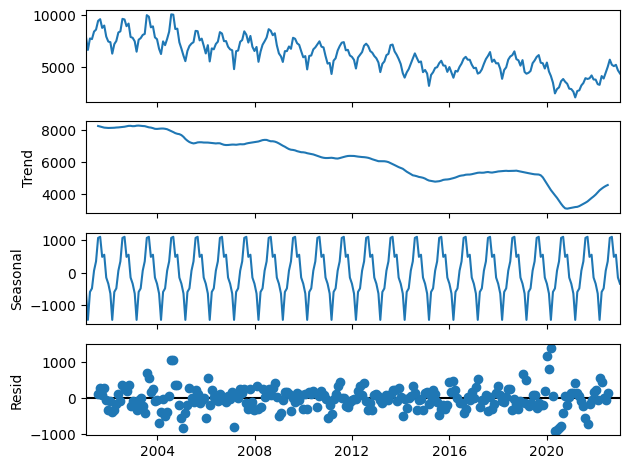

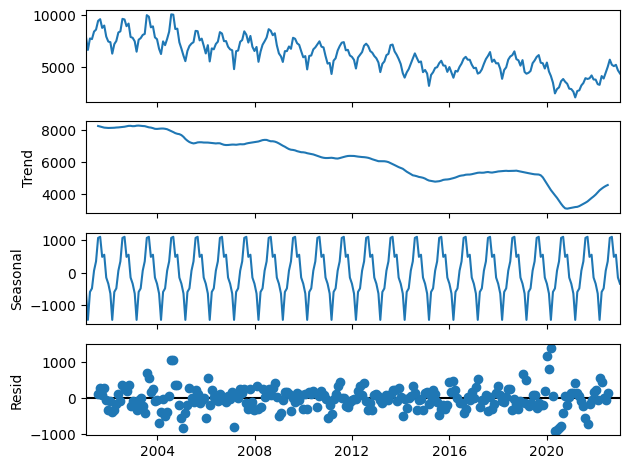

In [16]:
#decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_theft = seasonal_decompose(theft_ts, model='additive')
decomp_theft.plot()

In [17]:
full_df.shape

(7713109, 13)

In [18]:
#determine stationarity using ADF test
from statsmodels.tsa.stattools import adfuller

adfuller(theft_ts)[1]

np.float64(0.5851800781286368)

**so it is non stationarity and differencing is required**

In [19]:
# differencing
theft_ts_diff = theft_ts.diff().dropna()

In [20]:
#repeat ADF test
adfuller(theft_ts_diff)[1]

np.float64(0.0016731573192928163)

**now it is stationarity**

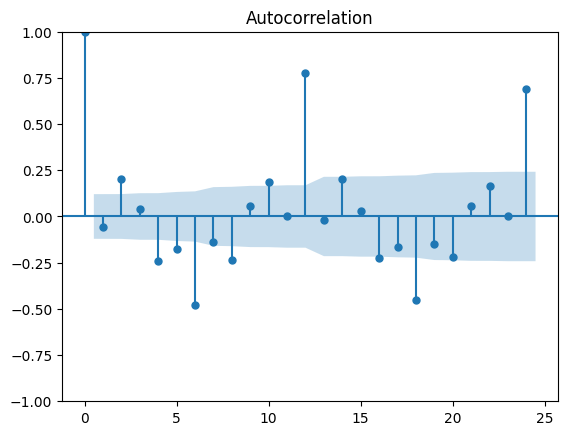

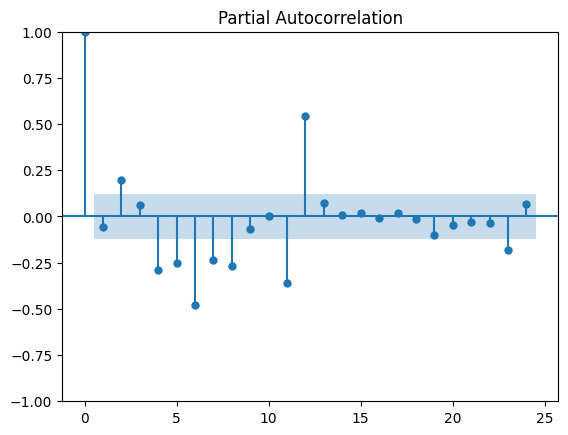

In [21]:
#plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(theft_ts_diff , lags=24);
plot_pacf(theft_ts_diff , lags=24);

In [22]:
# train and test split for historical evaluation
train_theft = theft_ts.iloc[:-12] # Using data up to end of 2021 for training
test_theft  = theft_ts.iloc[-12:] # Using 2022 data for testing

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#SARIMA model
sarima_theft = SARIMAX(
    train_theft,
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
).fit()

Forecasted values for the test period (2022):
2022-01-31    3284.635417
2022-02-28    2700.751298
2022-03-31    3070.424214
2022-04-30    3012.377420
2022-05-31    3535.939112
2022-06-30    3786.353147
2022-07-31    4225.444593
2022-08-31    4311.354524
2022-09-30    3997.388325
2022-10-31    4062.518368
2022-11-30    3600.539058
2022-12-31    3681.013347
Freq: ME, Name: predicted_mean, dtype: float64


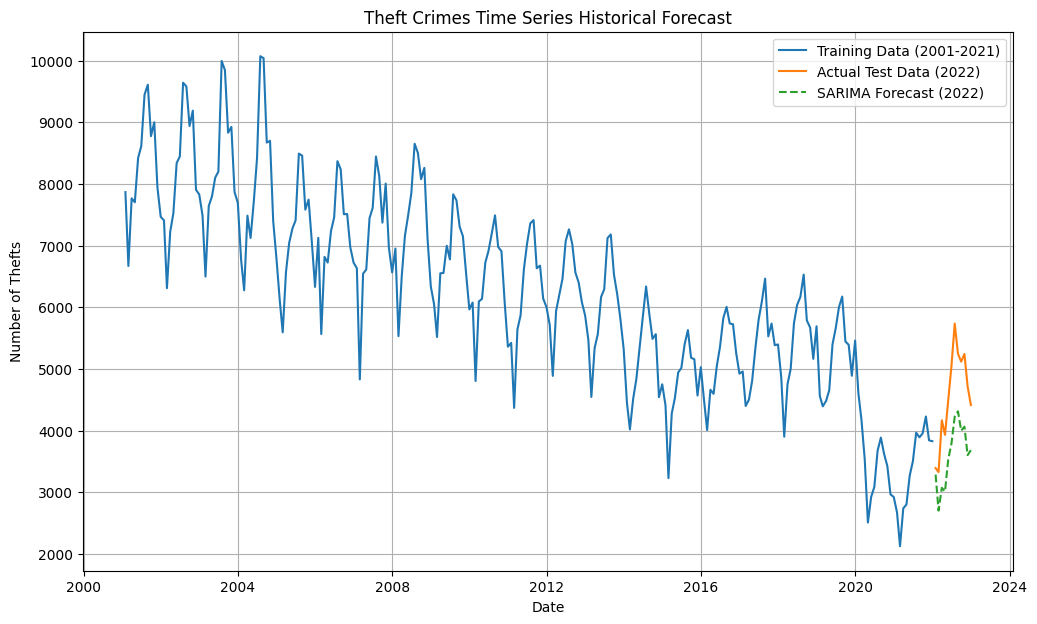

In [24]:
#forecast for the test period
forecast_theft = sarima_theft.forecast(steps=len(test_theft))
print("Forecasted values for the test period (2022):")
print(forecast_theft)

# Plot the historical forecast
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(train_theft.index, train_theft, label='Training Data (2001-2021)')
plt.plot(test_theft.index, test_theft, label='Actual Test Data (2022)')
plt.plot(forecast_theft.index, forecast_theft, label='SARIMA Forecast (2022)', linestyle='--')
plt.title('Theft Crimes Time Series Historical Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Thefts')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Evaluation metrics for historical forecast
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_theft  = mean_absolute_error(test_theft, forecast_theft)
rmse_theft = np.sqrt(mean_squared_error(test_theft, forecast_theft))
print(f"Mean Absolute Error (MAE): {mae_theft:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_theft:.2f}")

Mean Absolute Error (MAE): 962.61
Root Mean Squared Error (RMSE): 1021.53


In [26]:
#Auto ARIMA for historical forecast
!pip install pmdarima
from pmdarima import auto_arima

auto_theft = auto_arima(
    train_theft, # Use the new train_theft for historical evaluation
    seasonal=True,
    m=12,
    suppress_warnings=True
)

# Forecast for the test period (2022)
auto_forecast_theft = auto_theft.predict(n_periods=len(test_theft))
print("Auto ARIMA Forecasted values for the test period (2022):")
print(auto_forecast_theft)

# Evaluate Auto ARIMA forecast
auto_mae_theft  = mean_absolute_error(test_theft, auto_forecast_theft)
auto_rmse_theft = np.sqrt(mean_squared_error(test_theft, auto_forecast_theft))
print(f"Auto ARIMA MAE: {auto_mae_theft:.2f}")
print(f"Auto ARIMA RMSE: {auto_rmse_theft:.2f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.9 MB/s eta 0:00:00
Auto ARIMA Forecasted values for the test period (2022):
2022-01-31    3360.571732
2022-02-28    2859.428023
2022-03-31    3113.077228
2022-04-30    3001.478314
2022-05-31    3489.586183
2022-06-30    3716.277411
2022-07-31    4115.460741
2022-08-31    4218.923096
2022-09-30    3911.444172
2022-10-31    3946.968472
2022-11-30    3526.331803
2022-12-31    3628.287678
Freq: ME, dtype: float64
Auto ARIMA MAE: 994.35
Auto ARIMA RMSE: 1072.44


**Comparing the two models**

 for the historical 2022 period, the SARIMA model performed slightly better with lower MAE and RMSE values. This suggests that its forecasts were, on average, closer to the actual crime counts in 2022 and had fewer large prediction errors than the Auto ARIMA model.

It's important to remember that these metrics reflect the model's performance on known past data. While they give us an indication of reliability, future forecasts always carry inherent uncertainty.

Final Forecast for the next 6 months (starting from 2023-01-31):
2023-01-31    4024.423784
2023-02-28    3669.825540
2023-03-31    4237.401860
2023-04-30    4108.956078
2023-05-31    4658.038356
2023-06-30    5034.627817
Freq: ME, Name: predicted_mean, dtype: float64


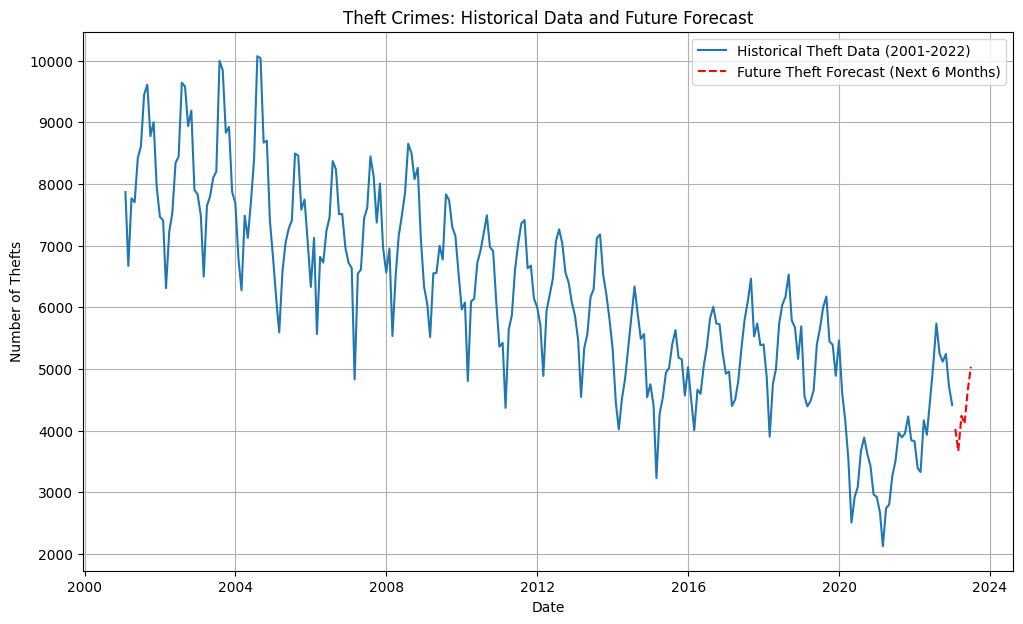

In [27]:
#final forecast
final_theft = SARIMAX(
    theft_ts,
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
).fit()

future_theft = final_theft.forecast(6)
print("Final Forecast for the next 6 months (starting from 2023-01-31):")
print(future_theft)

# Plotting the final forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(theft_ts.index, theft_ts, label='Historical Theft Data (2001-2022)')
plt.plot(future_theft.index, future_theft, label='Future Theft Forecast (Next 6 Months)', linestyle='--', color='red')
plt.title('Theft Crimes: Historical Data and Future Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Thefts')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#Net and Change
net_theft = future_theft.iloc[-1] - future_theft.iloc[0]
pct_theft = (net_theft / future_theft.iloc[0]) * 100
print("Net Theft:", net_theft)
print("Percent Change:", pct_theft)

Net Theft: 1010.2040327611476
Percent Change: 25.10183039952479


#1) Theft – Time Series Forecast

In [29]:
#build monthly series
assault_df = full_df[full_df['Primary Type'] == 'ASSAULT'].copy()

assault_ts = (
    assault_df
    .set_index('Date')
    .resample('ME')
    .size()
    .asfreq('ME', fill_value=0)
)

assault_ts.index.min(), assault_ts.index.max()

(Timestamp('2001-01-31 00:00:00'), Timestamp('2022-12-31 00:00:00'))

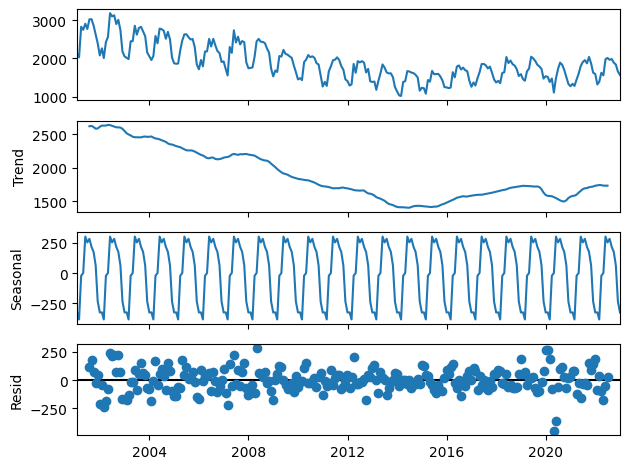

In [30]:
#decomposition
seasonal_decompose(assault_ts, model='additive').plot();

In [31]:
#check stationarity using ADF test
adfuller(assault_ts)[1]

np.float64(0.3624365777528107)

In [32]:
#differencing
assault_ts_diff = assault_ts.diff().dropna()

In [33]:
#recheck sationarity
adfuller(assault_ts_diff)[1]


np.float64(0.0017842560224121033)

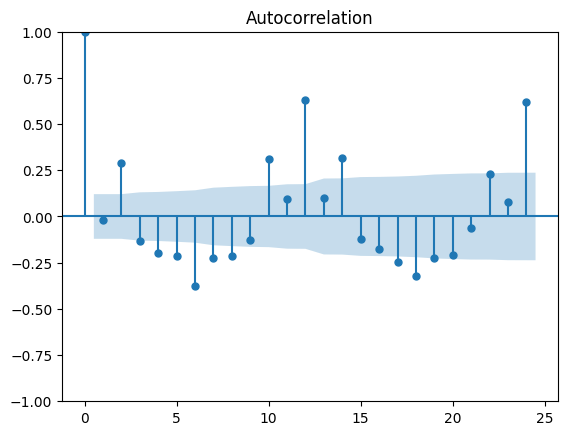

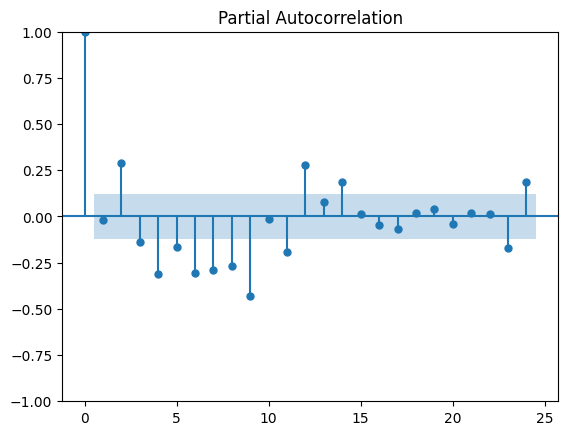

In [34]:
#ACF and PACF
plot_acf(assault_ts_diff , lags=24);
plot_pacf(assault_ts_diff , lags=24);

In [35]:
#train test
train_assault = assault_ts.iloc[:-6]
test_assault  = assault_ts.iloc[-6:]

In [36]:
#SAIMA model
sarima_assault = SARIMAX(
    train_assault,order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)).fit()

Forecasted values for the test period (2022):
2022-07-31    2016.040040
2022-08-31    1940.822151
2022-09-30    1896.529438
2022-10-31    1771.688014
2022-11-30    1558.720509
2022-12-31    1534.934989
Freq: ME, Name: predicted_mean, dtype: float64


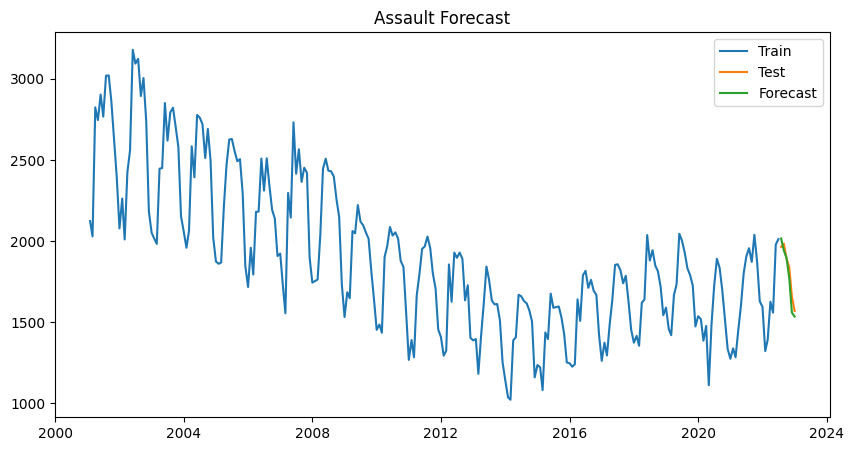

In [37]:
#forecast and plot
forecast_assault = sarima_assault.forecast(6)
print("Forecasted values for the test period (2022):")
print(forecast_assault)

# Plot the historical forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train_assault, label='Train')
plt.plot(test_assault, label='Test')
plt.plot(forecast_assault, label='Forecast')
plt.title('Assault Forecast')
plt.legend();

In [38]:
#evaluation
mae_assault  = mean_absolute_error(test_assault, forecast_assault)
rmse_assault = np.sqrt(mean_squared_error(test_assault, forecast_assault))

print(f"SARIMA Assault MAE: {mae_assault:.2f}")
print(f"SARIMA Assault RMSE: {rmse_assault:.2f}")

SARIMA Assault MAE: 50.40
SARIMA Assault RMSE: 58.24


In [39]:
#Auto ARIMA for historical forecast
!pip install pmdarima
from pmdarima import auto_arima

auto_assault = auto_arima(
    train_assault, # Use the new train_assaultfor historical evaluation
    seasonal=True,
    m=12,
    suppress_warnings=True
)

# Forecast for the test period (2022)
auto_forecast_assault = auto_assault.predict(n_periods=len(test_assault))
print("Auto ARIMA Forecasted values for the test period (2022):")
print(auto_forecast_assault)

# Evaluate Auto ARIMA forecast
auto_mae_assault  = mean_absolute_error(test_assault, auto_forecast_assault)
auto_rmse_assault = np.sqrt(mean_squared_error(test_assault, auto_forecast_assault))
print(f"Auto ARIMA MAE: {auto_mae_assault:.2f}")
print(f"Auto ARIMA RMSE: {auto_rmse_assault:.2f}")

Auto ARIMA Forecasted values for the test period (2022):
2022-07-31    2003.587870
2022-08-31    1919.673489
2022-09-30    1891.256886
2022-10-31    1779.466883
2022-11-30    1594.536557
2022-12-31    1588.412323
Freq: ME, dtype: float64
Auto ARIMA MAE: 41.26
Auto ARIMA RMSE: 47.93


In [40]:
#final forecast
final_assault = SARIMAX(
    assault_ts, order=(1,1,0),
    seasonal_order=(1,1,1,12)
).fit()
final_assault.summary()

# Generate future forecast for assault crimes (e.g., next 6 months)
future_assault = final_assault.forecast(steps=6)
print("Future forecast for assault crimes:")
print(future_assault)

Future forecast for assault crimes:
2023-01-31    1578.350137
2023-02-28    1508.104665
2023-03-31    1719.417876
2023-04-30    1701.577210
2023-05-31    1994.722287
2023-06-30    2049.919296
Freq: ME, Name: predicted_mean, dtype: float64


In [41]:
#net and %change
net_assault = future_assault.iloc[-1] - future_assault.iloc[0]
pct_assault = (net_assault / future_assault.iloc[0]) * 100
print ("Net Assault:", net_assault)
print("Percent Change:", pct_assault )

Net Assault: 471.5691585442114
Percent Change: 29.87734771122289


**comparing the two models**

For forecasting assault crimes on the historical 2022 test data, the Auto ARIMA model performed better than the manually configured SARIMA model. The Auto ARIMA model achieved lower MAE (41.26 vs. 50.40) and RMSE (47.93 vs. 58.24), indicating that its forecasts were, on average, closer to the actual assault crime counts and had smaller errors. This suggests that the automatically selected parameters by Auto ARIMA led to a more accurate model for this particular crime type and period.


**Answering the questions**

1- which of the two crimes is forecasted to have the highest monthly count of crimes at the end of the forecast?

 Theft crimes are forecasted to have the highest monthly count (approximately 5035 crimes) at the end of the forecast period compared to Assault crimes (approximately 2050 crimes).


 2- which of the two crimes is forecasted to have the highest net change by the end of the forecast?

 Theft Crime Forecast (Net Change over 6 months): The net change for Theft is 1010.20 crimes.
Assault Crime Forecast (Net Change over 6 months): The net change for Assault is 471.57 crimes.
Based on these calculations, Theft crimes are forecasted to have the highest net change (approximately 1010 crimes) by the end of the 6-month forecast period, compared to Assault crimes (approximately 472 crimes). This means the absolute increase in the number of theft crimes is predicted to be greater than that for assault


 3-which of the two crimes is forecasted to have the highest percent change by the end of the forecast?
  Assault crimes are forecasted to have the highest percentage change (approximately 29.88%) by the end of the 6-month forecast period, compared to Theft crimes (approximately 25.10%). This means that while Theft crimes have a higher absolute net change, Assault crimes are predicted to increase at a faster rate relative to their starting point.





**Recommendations to skateholders**

1-Focus on High-Crime Districts: Districts like 8.0 (with 14,805 crimes in 2022) should be prioritized for increased law enforcement presence and crime prevention programs, given its consistently high crime rate.

2-Enhanced PM Rush Hour Patrols: Crimes are significantly more common during PM rush hours (4-7 PM), with 49,315 incidents compared to 34,650 in AM rush hours. Stakeholders should consider deploying more resources (patrols, visible security) during these hours.

3-Specific Crime Type Focus: While Theft and Battery are high in both periods, the notable increase in Motor Vehicle Theft during PM rush hours suggests a need for targeted interventions against this specific crime during that timeframe.

In [42]:
# Filter full_df for District 8.0
district_8_df = full_df[full_df['District'] == 8.0]

print(f"Total crimes in District 8.0: {len(district_8_df)}")

Total crimes in District 8.0: 518549


In [43]:
# Get the top 5 most common primary crime types in District 8.0
top_5_crimes_district_8 = district_8_df['Primary Type'].value_counts().head(5)

print("\nTop 5 most common crimes in District 8.0:")
print(top_5_crimes_district_8)


Top 5 most common crimes in District 8.0:
Primary Type
THEFT              101273
BATTERY             86755
CRIMINAL DAMAGE     76028
BURGLARY            37933
NARCOTICS           35412
Name: count, dtype: int64
